In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `sersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input the radius, $R_e$, $n$ and the total stellar mass of the system.


In [3]:
def sersicE(r, re, n, mtot):
    """ Function that computes the Sersic Profile for an Elliptical 
    System, assuming M/L ~ 1
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        re: `float`
            The Effective radius (2D radius that contains 
            half the light) (kpc)
        n:  `float`
            sersic index
        mtot: `float`
            the total stellar mass (Msun)

    RETURNS
    -------
        I: `array of floats`
            the surface brightness profile of the elliptical in Lsun/kpc^2

    """

    # We are assuming M/L = 1, so the total luminosity is:
    lum = mtot
    
    # the effective surface brightness is
    Ie = lum/7.2/np.pi/re**2
    
    # Break down the equation 
    a = (r/re)**(1.0/n)
    b = -7.67*(a-1)
    
    # The surface brightness
    #I = Ie*np.exp(-7.67*((r/re)**(1.0/n)-1.0))
    I = Ie*np.exp(b)
    
    return I
    
    

# Part B

a) Create an instance of the MassProfile Class for the M31. Store it as a variable `M31`. 


In [4]:
# a)  Create a mass profile object for the Milky Way 
#using solution to Homework 5
M31 = MassProfile("M31",0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [6]:
# b) Array of radii 
r = np.arange(0.1,30,0.1)

c) Define a new array called `bulge_mass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `bulge_mass` by adding `.value` 

In [9]:
# c) Use Mass Profile to return the Bulge Mass Profile at each value of R
# Recall that particle type 3 = bulge
bulge_mass = M31.massEnclosed(3,r).value  # Get rid of astropy units

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `bulge_I`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [26]:
# d) Surface brightness profile
# Density of Light  Assume M ~ L 
# I = L/4/pi/D^2
bulge_I = bulge_mass/4/np.pi/r**2  

## Caveat: for your own research project, you should compute here 
## the mass density in shells, rather than using the cumulative 
# mass profile

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [11]:
# Determine the total mass of the bulge
bulge_total = ComponentMass("M31_000.txt",3)*1e12
print(f"{bulge_total:.2e}")

1.90e+10


In [14]:
# Find the effective radius of the bulge, which encloses half of the mass
b_half = bulge_total/2.0
index = np.where((bulge_mass > b_half)) #  & (BulgeMass < Bhigh))
print(b_half)
print(bulge_mass[index][0])

9500000000.0
9669363719.999996


In [15]:
# Effective radius of the bulge
re_bulge = r[index][0]  # take first index where Bulge Mass > Blow
print(re_bulge)

2.6


# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

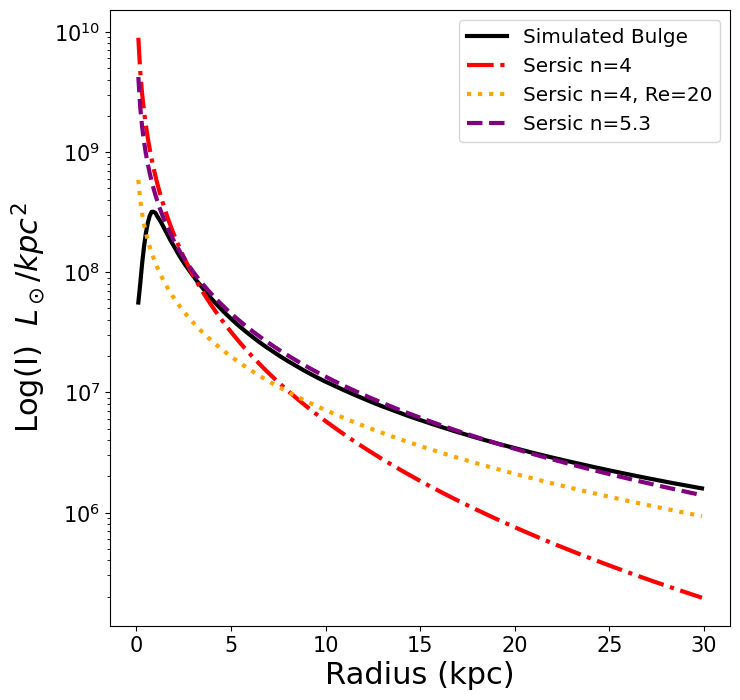

In [57]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)

#adjust tick label font size
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size



# plot the bulge mass density as a proxy for surface brighntess
plt.semilogy(r,bulge_I, color='black',linewidth=3, 
             label='Simulated Bulge')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic n = 4 - de Vaucouleurs
plt.semilogy(r,sersicE(r,re_bulge,4,bulge_total), color='red',
             linestyle="-.",linewidth=3, label='Sersic n=4')


# Try other profiles
# n=4 but increasing the effective radius
plt.semilogy(r,sersicE(r,20,4,bulge_total), color='orange', 
             linestyle=":",linewidth=3, label='Sersic n=4, Re=20')

# keeping effective radius fixed, but changing n 
plt.semilogy(r,sersicE(r,re_bulge,5.3,bulge_total), color='purple',
             linestyle="--",linewidth=3, label='Sersic n=5.3')



# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

plt.savefig('Lab6.png')